In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.size'] = 11

df = pd.read_csv('recruitment_data.csv')

X = df.drop('HiringDecision', axis=1)
y = df['HiringDecision']

categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X[col] = pd.Categorical(X[col]).codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("="*60)
print("LOGISTIC REGRESSION MODEL PERFORMANCE")
print("="*60)
print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score:  {f1:.4f} ({f1*100:.2f}%)")
print("="*60)

LOGISTIC REGRESSION MODEL PERFORMANCE
Accuracy:  0.8667 (86.67%)
Precision: 0.7848 (78.48%)
Recall:    0.7294 (72.94%)
F1-Score:  0.7561 (75.61%)


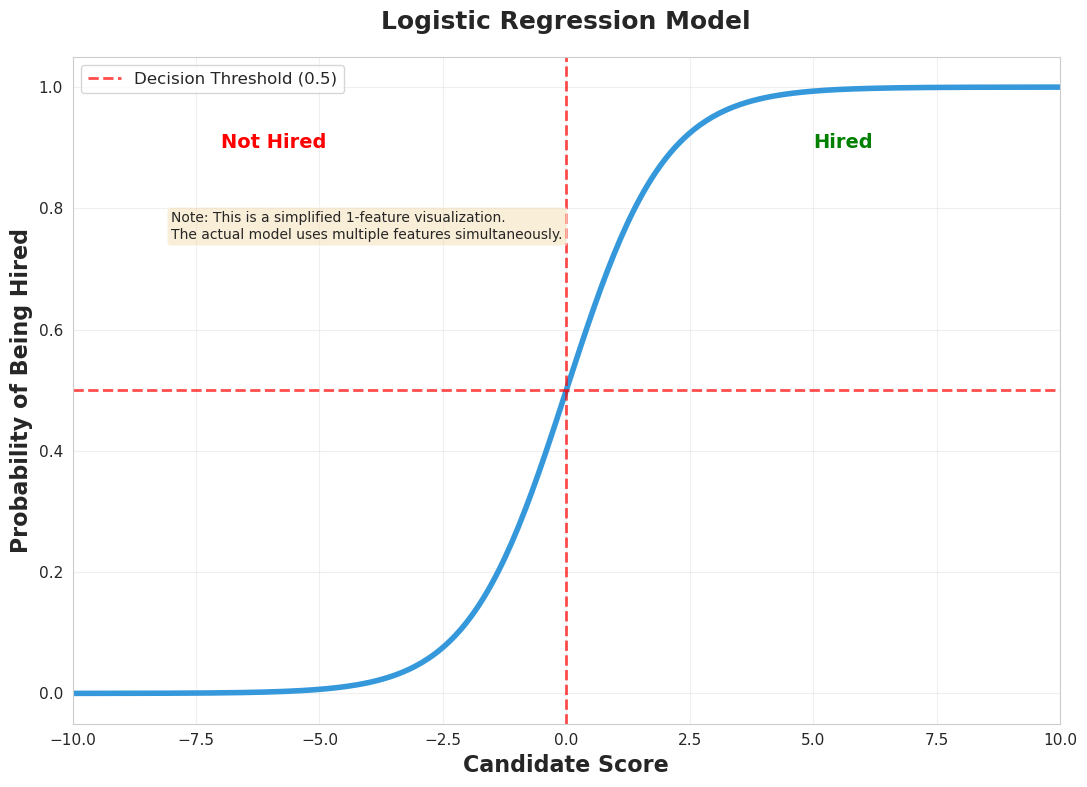

In [14]:
x_values = np.linspace(-10, 10, 300)
y_values = 1 / (1 + np.exp(-x_values))

plt.figure(figsize=(11, 8))
plt.plot(x_values, y_values, color='#3498db', linewidth=4)
plt.axhline(y=0.5, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Decision Threshold (0.5)')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, alpha=0.7)

plt.xlabel('Candidate Score', fontsize=16, fontweight='bold')
plt.ylabel('Probability of Being Hired', fontsize=16, fontweight='bold')
plt.title('Logistic Regression Model', fontsize=18, fontweight='bold', pad=20)

plt.text(-7, 0.9, 'Not Hired', fontsize=14, color='red', fontweight='bold')
plt.text(5, 0.9, 'Hired', fontsize=14, color='green', fontweight='bold')

plt.text(-8, 0.75, 'Note: This is a simplified 1-feature visualization.\nThe actual model uses multiple features simultaneously.', 
         fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.legend(fontsize=12, loc='upper left')
plt.grid(alpha=0.3)
plt.xlim(-10, 10)
plt.ylim(-0.05, 1.05)
plt.tight_layout()
plt.savefig('sigmoid_curve.png', dpi=300, bbox_inches='tight')
plt.show()

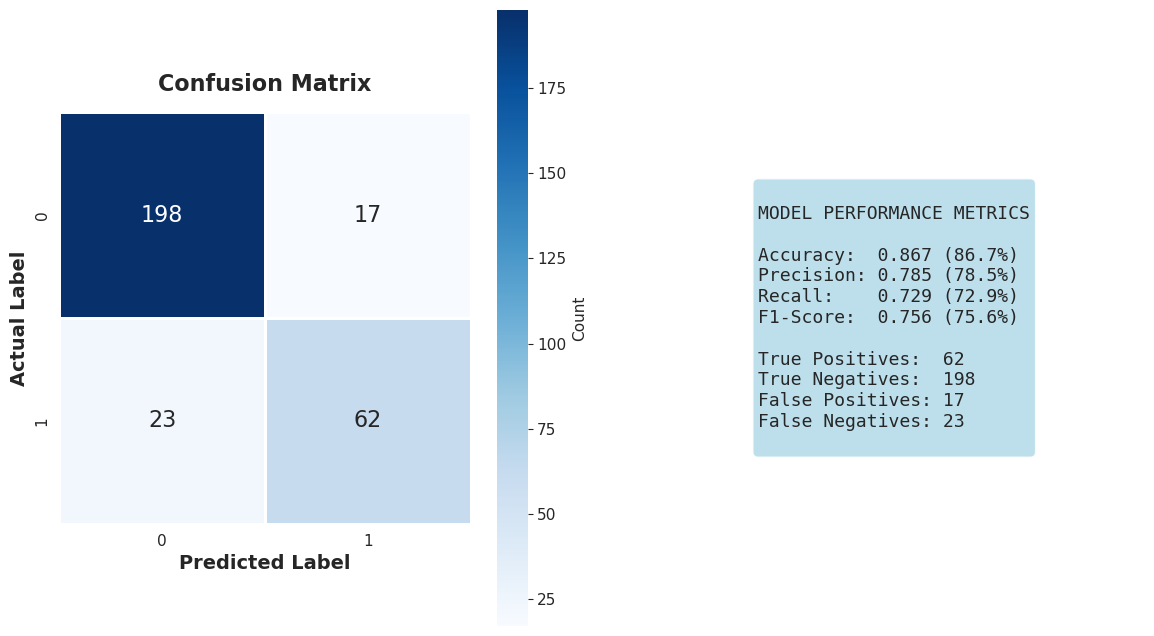

In [19]:
cm = confusion_matrix(y_test, y_pred)

fig = plt.figure(figsize=(14, 8))
gs = fig.add_gridspec(1, 2, width_ratios=[1.2, 1], wspace=0.3)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, linewidths=2, 
            cbar_kws={'label': 'Count'}, ax=ax1, annot_kws={'size': 16})
ax1.set_xlabel('Predicted Label', fontsize=14, fontweight='bold')
ax1.set_ylabel('Actual Label', fontsize=14, fontweight='bold')
ax1.set_title('Confusion Matrix', fontsize=16, fontweight='bold', pad=15)

metrics_text = f"""
MODEL PERFORMANCE METRICS

Accuracy:  {accuracy:.3f} ({accuracy*100:.1f}%)
Precision: {precision:.3f} ({precision*100:.1f}%)
Recall:    {recall:.3f} ({recall*100:.1f}%)
F1-Score:  {f1:.3f} ({f1*100:.1f}%)

True Positives:  {cm[1,1]}
True Negatives:  {cm[0,0]}
False Positives: {cm[0,1]}
False Negatives: {cm[1,0]}
"""

ax2.text(0.1, 0.5, metrics_text, fontsize=13, family='monospace',
         verticalalignment='center', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
ax2.axis('off')

plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

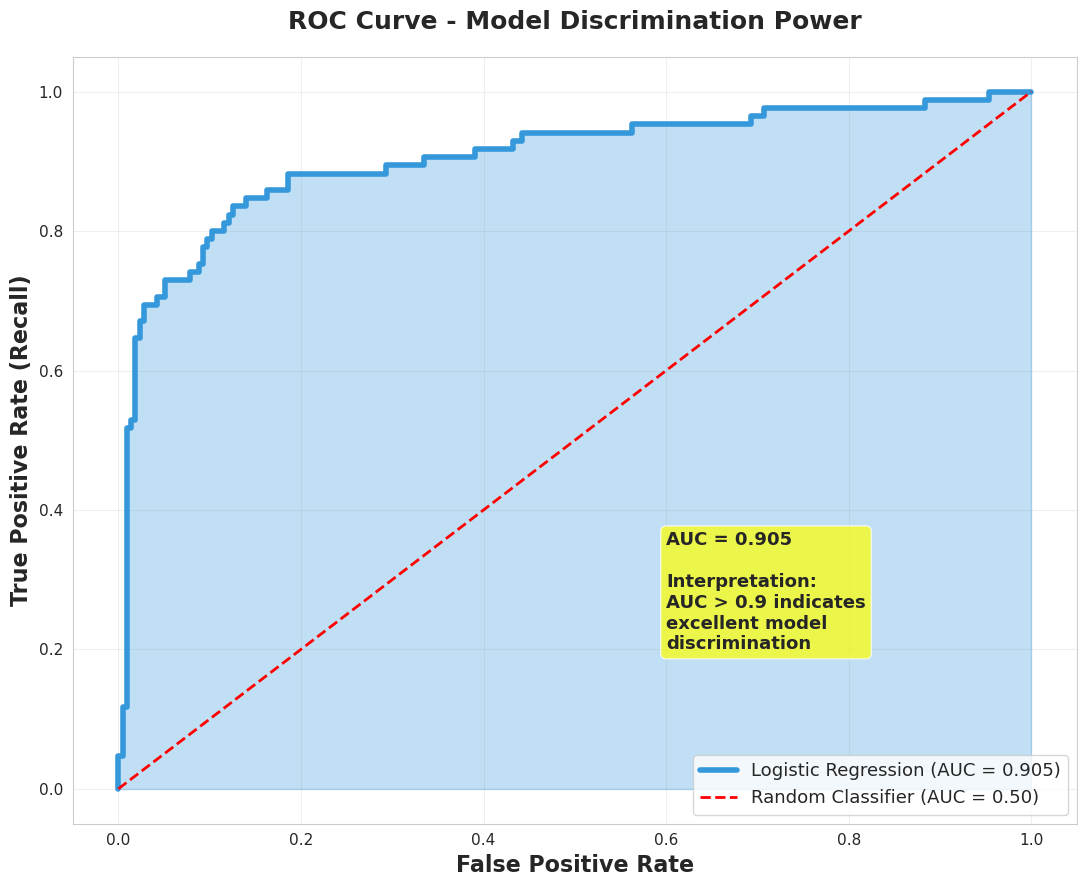

In [16]:
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(11, 9))
plt.plot(fpr, tpr, color='#3498db', linewidth=4, label=f'Logistic Regression (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Random Classifier (AUC = 0.50)')
plt.fill_between(fpr, tpr, alpha=0.3, color='#3498db')
plt.xlabel('False Positive Rate', fontsize=16, fontweight='bold')
plt.ylabel('True Positive Rate (Recall)', fontsize=16, fontweight='bold')
plt.title('ROC Curve - Model Discrimination Power', fontsize=18, fontweight='bold', pad=20)

interpretation_text = f'AUC = {auc_score:.3f}\n\nInterpretation:\nAUC > 0.9 indicates\nexcellent model\ndiscrimination'
plt.text(0.6, 0.2, interpretation_text, fontsize=13, 
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7), fontweight='bold')

plt.legend(fontsize=13, loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

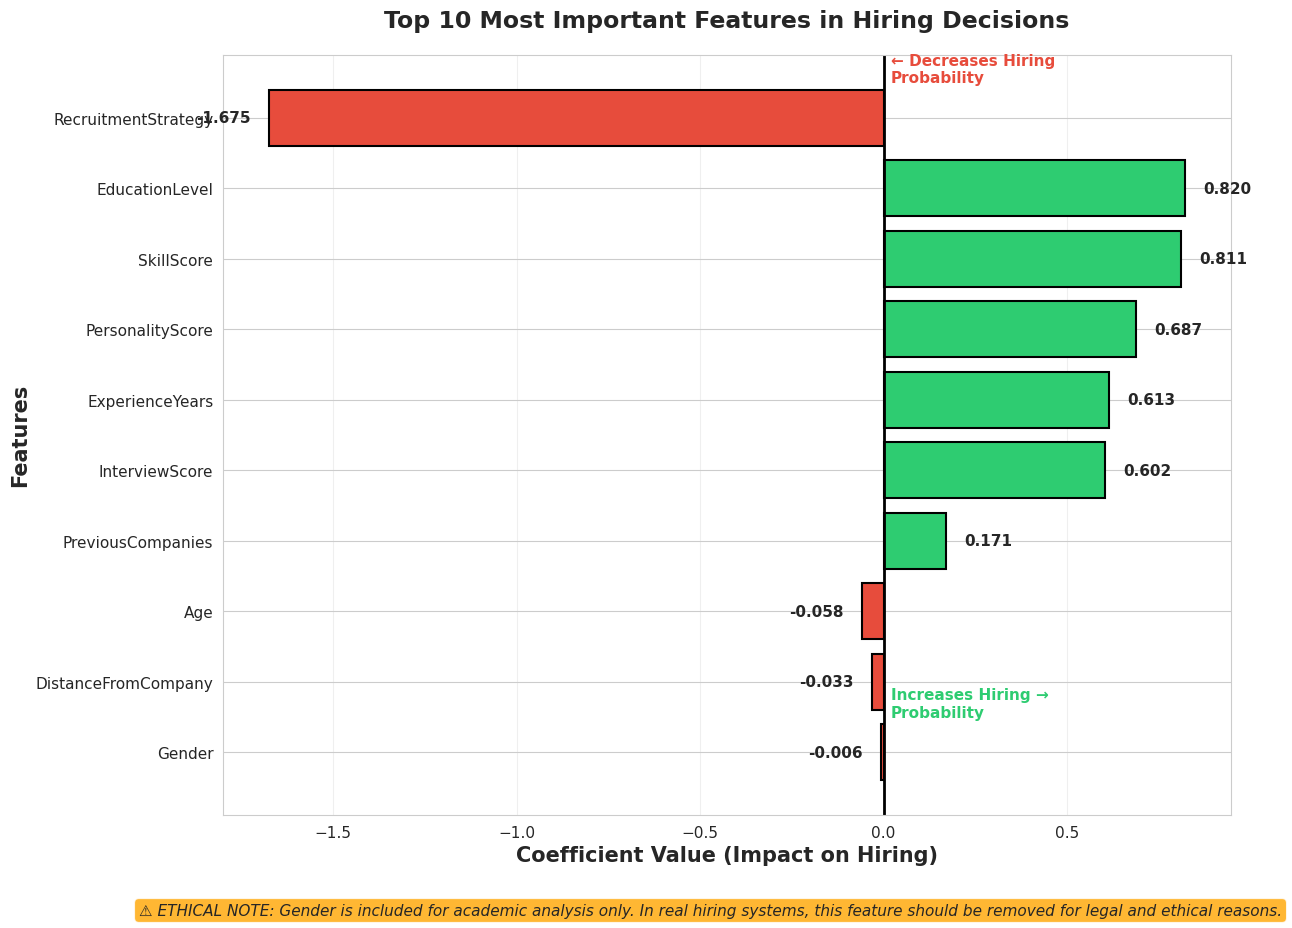

In [17]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=True).tail(10)

fig, ax = plt.subplots(figsize=(13, 10))

colors = ['#e74c3c' if x < 0 else '#2ecc71' for x in feature_importance['Coefficient']]
bars = ax.barh(feature_importance['Feature'], feature_importance['Coefficient'], 
               color=colors, edgecolor='black', linewidth=1.5)

ax.set_xlabel('Coefficient Value (Impact on Hiring)', fontsize=15, fontweight='bold')
ax.set_ylabel('Features', fontsize=15, fontweight='bold')
ax.set_title('Top 10 Most Important Features in Hiring Decisions', fontsize=17, fontweight='bold', pad=20)
ax.axvline(x=0, color='black', linestyle='-', linewidth=2)

for i, (feat, coef) in enumerate(zip(feature_importance['Feature'], feature_importance['Coefficient'])):
    ax.text(coef + (0.05 if coef > 0 else -0.05), i, f'{coef:.3f}', 
            va='center', ha='left' if coef > 0 else 'right', fontsize=11, fontweight='bold')

ax.text(0.02, 9.5, '← Decreases Hiring\nProbability', fontsize=11, color='#e74c3c', fontweight='bold')
ax.text(0.02, 0.5, 'Increases Hiring →\nProbability', fontsize=11, color='#2ecc71', fontweight='bold')

ax.grid(axis='x', alpha=0.3)

if 'Gender' in X.columns:
    fig.text(0.5, 0.02, 
             "⚠️ ETHICAL NOTE: Gender is included for academic analysis only. "
             "In real hiring systems, this feature should be removed for legal and ethical reasons.",
             ha='center', fontsize=11, style='italic', wrap=True,
             bbox=dict(boxstyle='round', facecolor='orange', alpha=0.8))

plt.subplots_adjust(bottom=0.12)
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
print("\n" + "="*60)
print("KEY INSIGHTS FROM FEATURE IMPORTANCE")
print("="*60)
print("\nPositive Impact (Increases Hiring Probability):")
positive_features = feature_importance[feature_importance['Coefficient'] > 0].sort_values('Coefficient', ascending=False)
for idx, row in positive_features.iterrows():
    print(f"  • {row['Feature']}: +{row['Coefficient']:.4f}")

print("\nNegative Impact (Decreases Hiring Probability):")
negative_features = feature_importance[feature_importance['Coefficient'] < 0].sort_values('Coefficient')
for idx, row in negative_features.iterrows():
    print(f"  • {row['Feature']}: {row['Coefficient']:.4f}")
print("="*60)


KEY INSIGHTS FROM FEATURE IMPORTANCE

Positive Impact (Increases Hiring Probability):
  • EducationLevel: +0.8201
  • SkillScore: +0.8109
  • PersonalityScore: +0.6870
  • ExperienceYears: +0.6132
  • InterviewScore: +0.6020
  • PreviousCompanies: +0.1706

Negative Impact (Decreases Hiring Probability):
  • RecruitmentStrategy: -1.6749
  • Age: -0.0581
  • DistanceFromCompany: -0.0327
  • Gender: -0.0060
